<a href="https://colab.research.google.com/github/Abubakar26/CNN-Fyp/blob/master/cnnp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ytest 1
Xtrain (5576, 90, 90, 3)
Ytrain (5576,)
Ytest (1394,)
Xtest (1394, 90, 90, 3)


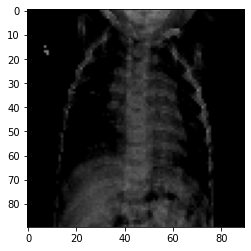

Train on 5018 samples, validate on 558 samples
Epoch 1/10
5018/5018 [==============================] - 25s 5ms/step - loss: 0.6183 - accuracy: 0.7810 - val_loss: 0.4933 - val_accuracy: 0.8620
Epoch 2/10
5018/5018 [==============================] - 24s 5ms/step - loss: 0.3785 - accuracy: 0.8848 - val_loss: 0.3300 - val_accuracy: 0.8996
Epoch 3/10
5018/5018 [==============================] - 24s 5ms/step - loss: 0.2986 - accuracy: 0.9091 - val_loss: 0.3106 - val_accuracy: 0.8925
Epoch 4/10
5018/5018 [==============================] - 24s 5ms/step - loss: 0.2560 - accuracy: 0.9219 - val_loss: 0.2855 - val_accuracy: 0.9104
Epoch 5/10
5018/5018 [==============================] - 24s 5ms/step - loss: 0.2182 - accuracy: 0.9338 - val_loss: 0.2550 - val_accuracy: 0.9104
Epoch 6/10
5018/5018 [==============================] - 24s 5ms/step - loss: 0.1894 - accuracy: 0.9434 - val_loss: 0.3082 - val_accuracy: 0.8943
Epoch 7/10
5018/5018 [==============================] - 24s 5ms/step - loss: 0.1616

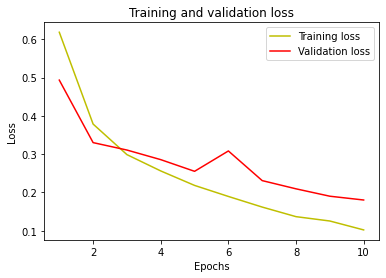

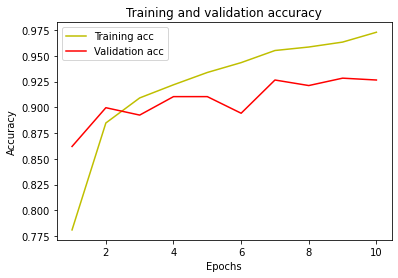

Test loss: 1
Test accuracy: 1
prediction 3921
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 86, 86, 128)       9728      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 83, 83, 128)       262272    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_

In [3]:
from google.colab import drive 
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Colab Notebooks"
import pickle as pk
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import SGD
from sklearn.model_selection import KFold

batch_size = 128
num_classes = 3
epochs = 10
import os
pickle_in1=open(DATA_PATH+"/colorxray","rb")
X=pk.load(pickle_in1)
pickle_in2=open(DATA_PATH+"/colorlabels","rb")
Y=pk.load(pickle_in2)
# X,Y=shuffle(X,Y)
print(Y[6575])
x_train,x_test,y_train,y_test = tts(X,Y,train_size=0.8)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
Y_test=y_test
x_train=x_train/255-0.5
x_test=x_test/255-0.5
print("ytest",Y_test[0])
print("Xtrain",x_train.shape)
print("Ytrain",y_train.shape)
print("Ytest",y_test.shape)
print("Xtest",x_test.shape)
plt.imshow(x_train[200])
plt.show()
opt=SGD(lr=0.0001)
y_train = keras.utils.to_categorical(y_train,3)
y_test = keras.utils.to_categorical(y_test,3)
# print(X_train.shape)
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),activation='relu', input_shape=(90,90,3)))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(BatchNormalization(momentum=0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(0.0001),metrics=['accuracy'])
model.get_weights()

history=model.fit(x_train,y_train, batch_size=batch_size, shuffle=True ,epochs=epochs,verbose=1 ,validation_split=0.1,callbacks=[Callback()] )
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
accu = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accu, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
pd=model.predict(x_test, batch_size=None, verbose=0, steps=None, callbacks=[], max_queue_size=10, workers=1, use_multiprocessing=False)
print('Test loss:', np.argmax(score))
print('Test accuracy:', np.argmax(score))
print("prediction",np.argmax(pd))
print(model.summary())
model.save('cnnp1xx2')
# import pickle as pk
# pk.dump(model,open(filename,'wb')) 
# model_save_name = 'cnn1x2'
# pk.dump(model,open(DATA_PATH+'/'+model_save_name,'wb'))
# path = (DATA_PATH+"/"+model_save_name) 
# model.save(path)
ev=model.evaluate(x_test,y_test)
print("Evaluation",np.argmax(ev))
print("%s: %.2f%%" % (model.metrics_names[1], ev[1]*100))
del model

In [7]:
import pickle as pk
from google.colab import drive 
from keras.models import load_model
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Colab Notebooks"
# model=pk.load(open(DATA_PATH+'/cnnpkl','rb'))
model=load_model('cnnp1xx2')
import cv2
cat=['Normal','Pneumonia','TB']
img=cv2.imread(DATA_PATH+'/person5_bacteria_15.jpeg')
img=cv2.resize(img,(90,90))
import numpy
img=numpy.reshape(img,(-1,90,90,3))
img=img/255-0.5
pred=model.predict(img)
print(np.argmax(pred[0]))
# print (str(cat[int(pred[0][1])]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1
